<a href="https://colab.research.google.com/github/arutraj/ML_Basics/blob/main/Neural_Networks_using_Keras_June8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps to solve Emergency vs Non-Emergency vehicle classification problem

<ol>1. Loading the dataset</ol>
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the model architecture</ol>
<ol>5. Compiling the model</ol>
<ol>6. Training the model</ol>
<ol>7. Evaluating model performance</ol>

## 1. Loading the dataset

In [1]:
# import necessary libraries and functions  - glob to read multiple images
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dense, InputLayer
from keras.models import Sequential

from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/Dataset.zip

Archive:  /content/Dataset.zip
replace Dataset/emergency_classification.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Dataset/images/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
# reading the csv file
data = pd.read_csv('/content/emergency_classification.csv')

In [3]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [4]:
# looking at first five rows of the data
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [5]:
# distribution of classes in the dataset
data['emergency_or_not'].value_counts()

emergency_or_not
0    1361
1     991
Name: count, dtype: int64

In [6]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)

# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

In [7]:
# shape of the image
X.shape

(2352, 224, 224, 3)

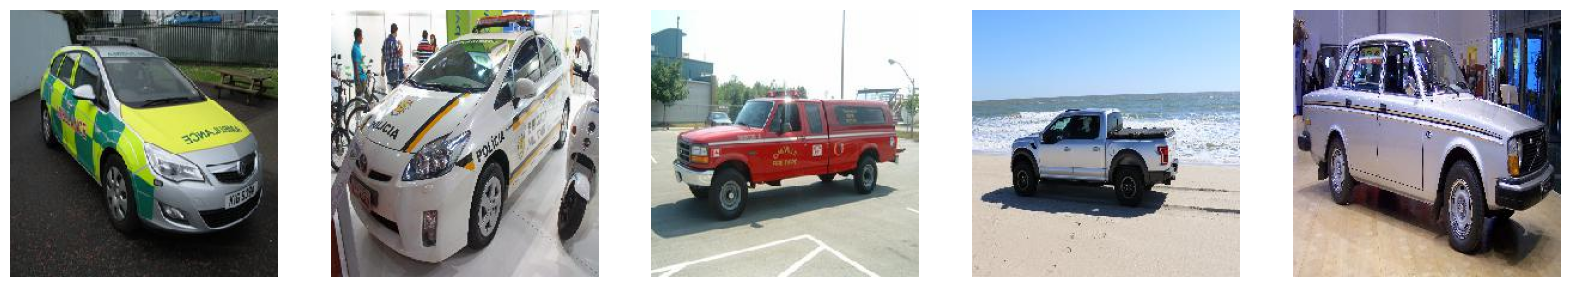

In [ ]:
# visualizing images
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(X[i*400])
    ax[i].axis('off')

## 2. Pre-processing the data

![alt text](https://drive.google.com/uc?id=1qrMvsKOgTmo4Zt93r8G84Z5I_2IfVduq)

In [8]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [9]:
# minimum and maximum pixel values of images
X.min(), X.max()

(0, 255)

In [10]:
# normalizing the pixel values
X = X / X.max()

In [11]:
# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

## 3. Creating training and validation set

In [12]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [13]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

## 4. Defining the model architecture

In [ ]:
# defining the architecture of the model
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

NameError: name 'Sequential' is not defined

In [ ]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               15052900  
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15053001 (57.42 MB)
Trainable params: 15053001 (57.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 5. Compiling the model

In [ ]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

## 6. Training the model

In [ ]:
# training the model
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 [==============================] - 6s 230ms/step - loss: 0.7888 - accuracy: 0.5687 - val_loss: 0.6527 - val_accuracy: 0.6034
Epoch 2/50
13/13 [==============================] - 1s 89ms/step - loss: 0.6434 - accuracy: 0.6330 - val_loss: 0.6298 - val_accuracy: 0.6445
Epoch 3/50
13/13 [==============================] - 1s 85ms/step - loss: 0.6368 - accuracy: 0.6373 - val_loss: 0.6210 - val_accuracy: 0.6544
Epoch 4/50
13/13 [==============================] - 1s 105ms/step - loss: 0.6108 - accuracy: 0.6841 - val_loss: 0.6064 - val_accuracy: 0.6799
Epoch 5/50
13/13 [==============================] - 1s 107ms/step - loss: 0.6174 - accuracy: 0.6652 - val_loss: 0.7720 - val_accuracy: 0.5637
Epoch 6/50
13/13 [==============================] - 1s 110ms/step - loss: 0.6058 - accuracy: 0.6908 - val_loss: 0.5886 - val_accuracy: 0.6827
Epoch 7/50
13/13 [==============================] - 1s 88ms/step - loss: 0.6205 - accuracy: 0.6543 - val_loss: 0.5901 - val_accuracy: 0.6870
Epoch 8/5

## 7. Evaluating model performance

In [ ]:
# getting predictions in the form of class as well as probabilities
predictions = model.predict_classes(X_valid)[:,0]
prediction_probabilities = model.predict(X_valid)[:, 0]

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
prediction = prediction_probabilities.reshape(-1,)

# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(np.int64)

In [ ]:
# accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, prediction_int), '%')

Accuracy on validation set: 0.6997167138810199 %


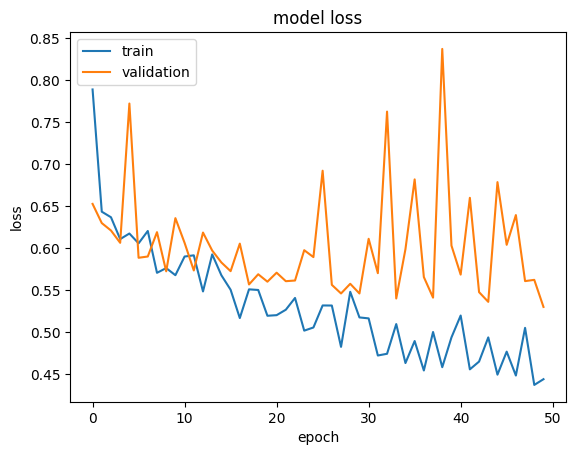

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

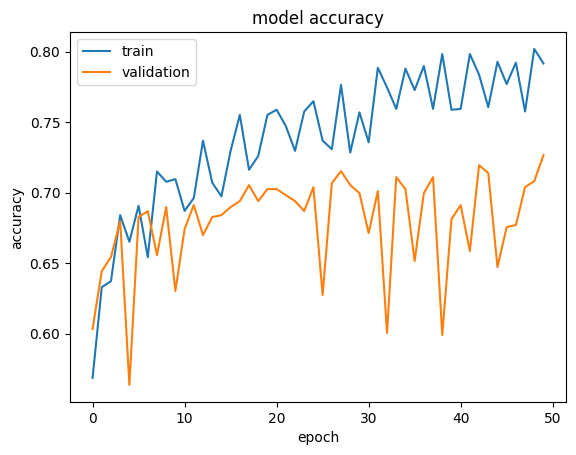

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# pull out the original images from the data which correspond to the validation data
_, valid_vehicles, _, valid_y = train_test_split(data.image_names.values, y, test_size=0.3, random_state=seed)

# get a random index to plot image randomly
index = rng.choice(range(len(valid_vehicles)))

# get the corresponding image name and probability
img_name = valid_vehicles[index]
prob = (predictions * 100).astype(int64)[index]

# read the image
img = plt.imread('Dataset/images/' + img_name)

# print probability and actual class
print('Model is', prob , '% sure that it is emergency')
print('And actual class is ', valid_y[index])

# plot image
plt.imshow(img)

NameError: name 'train_test_split' is not defined

# Hyperparameter tuning of neural networks

<ol>1. change activation function of hidden layer</ol>
<ol>2. increase hidden neurons</ol>
<ol>3. increase hidden layers</ol>
<ol>4. increase number of epochs</ol>
<ol>5. change optimizer</ol>

### 1. Changing activation function of hidden layer

In [ ]:
# using relu as activation function in hidden layer
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               15052900  
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15053001 (57.42 MB)
Trainable params: 15053001 (57.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# training the model for 50 epochs
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 [==============================] - 5s 195ms/step - loss: 1.1863 - accuracy: 0.5674 - val_loss: 0.6750 - val_accuracy: 0.5609
Epoch 2/50
13/13 [==============================] - 1s 106ms/step - loss: 0.6595 - accuracy: 0.5923 - val_loss: 0.6406 - val_accuracy: 0.6643
Epoch 3/50
13/13 [==============================] - 1s 102ms/step - loss: 0.6506 - accuracy: 0.6209 - val_loss: 0.6381 - val_accuracy: 0.6544
Epoch 4/50
13/13 [==============================] - 2s 122ms/step - loss: 0.6473 - accuracy: 0.6294 - val_loss: 0.6246 - val_accuracy: 0.6530
Epoch 5/50
13/13 [==============================] - 2s 138ms/step - loss: 0.6217 - accuracy: 0.6610 - val_loss: 0.6072 - val_accuracy: 0.6643
Epoch 6/50
13/13 [==============================] - 2s 124ms/step - loss: 0.6188 - accuracy: 0.6598 - val_loss: 0.5987 - val_accuracy: 0.6912
Epoch 7/50
13/13 [==============================] - 1s 106ms/step - loss: 0.6001 - accuracy: 0.6950 - val_loss: 0.5949 - val_accuracy: 0.6983
Epoch 

In [ ]:
# getting predictions in the form of class as well as probabilities

predictions = model.predict(X_valid)[:, 0]
prediction = predictions.reshape(-1,)

# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(np.int64)

23/23 [==============================] - 1s 29ms/step


In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid,prediction_int), '%')

Accuracy on validation set: 0.6997167138810199 %


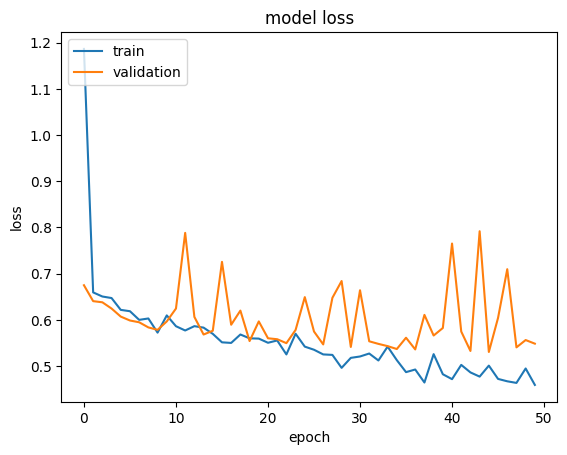

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 2. Increasing hidden neurons

In [ ]:
# increase hidden neurons
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              154141696 
                                                                 
 dense_1 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 154142721 (588.01 MB)
Trainable params: 154142721 (588.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 [==============================] - 6s 214ms/step - loss: 1.4724 - accuracy: 0.5273 - val_loss: 0.9631 - val_accuracy: 0.5609
Epoch 2/50
13/13 [==============================] - 2s 122ms/step - loss: 0.6702 - accuracy: 0.6294 - val_loss: 0.6532 - val_accuracy: 0.6105
Epoch 3/50
13/13 [==============================] - ETA: 0s - loss: 0.6957 - accuracy: 0.5930

KeyboardInterrupt: 

In [ ]:
# getting predictions in the form of class as well as probabilities

predictions = model.predict(X_valid)[:, 0]
prediction = predictions.reshape(-1,)

# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(np.int64)

23/23 [==============================] - 1s 18ms/step


In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, prediction_int), '%')

Accuracy on validation set: 0.6827195467422096 %


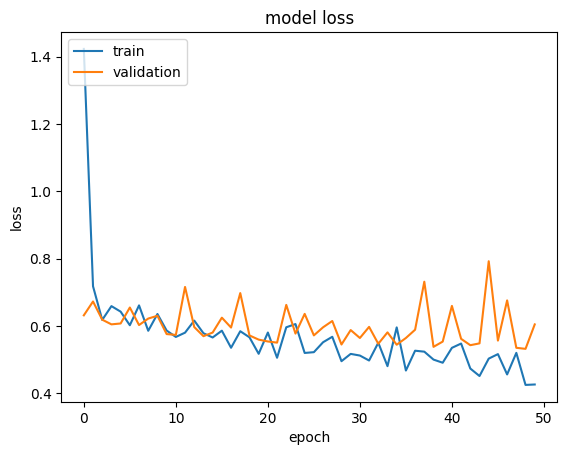

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 3. Increasing hidden layers

In [ ]:
# increase hidden layers
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               15052900  
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15063101 (57.46 MB)
Trainable params: 15063101 (57.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 [==============================] - 5s 191ms/step - loss: 0.6967 - accuracy: 0.5863 - val_loss: 0.6791 - val_accuracy: 0.5609
Epoch 2/50
13/13 [==============================] - 1s 104ms/step - loss: 0.6707 - accuracy: 0.5863 - val_loss: 0.6739 - val_accuracy: 0.5609
Epoch 3/50
13/13 [==============================] - 1s 85ms/step - loss: 0.6668 - accuracy: 0.5863 - val_loss: 0.6709 - val_accuracy: 0.5609
Epoch 4/50
13/13 [==============================] - 1s 86ms/step - loss: 0.6625 - accuracy: 0.5863 - val_loss: 0.6666 - val_accuracy: 0.5609
Epoch 5/50
13/13 [==============================] - 1s 116ms/step - loss: 0.6582 - accuracy: 0.5863 - val_loss: 0.6601 - val_accuracy: 0.5609
Epoch 6/50
13/13 [==============================] - 2s 138ms/step - loss: 0.6540 - accuracy: 0.5893 - val_loss: 0.6554 - val_accuracy: 0.5666
Epoch 7/50
13/13 [==============================] - 2s 141ms/step - loss: 0.6476 - accuracy: 0.5990 - val_loss: 0.6491 - val_accuracy: 0.6091
Epoch 8/

In [ ]:
# getting predictions in the form of class as well as probabilities

predictions = model.predict(X_valid)[:, 0]
prediction = predictions.reshape(-1,)

# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(np.int64)

23/23 [==============================] - 1s 18ms/step


In [ ]:
# accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid,prediction_int), '%')

Accuracy on validation set: 0.7025495750708215 %


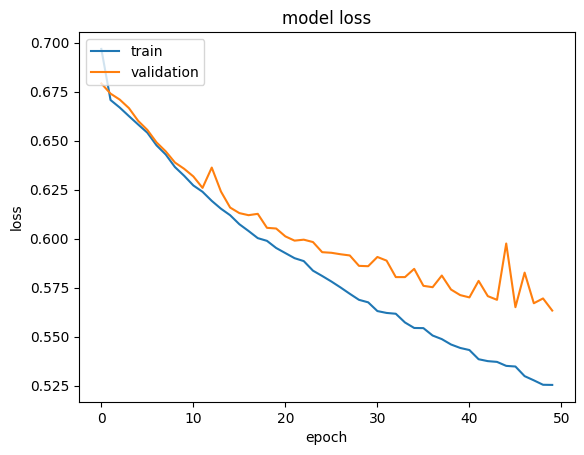

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 4. Increasing number of epochs

In [ ]:
# increase number of epochs
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               15052900  
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15053001 (57.42 MB)
Trainable params: 15053001 (57.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

In [ ]:
# getting predictions in the form of class as well as probabilities

predictions = model.predict(X_valid)[:, 0]
prediction = predictions.reshape(-1,)

# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(np.int64)

23/23 [==============================] - 0s 12ms/step


In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, prediction_int), '%')

Accuracy on validation set: 0.7478753541076487 %


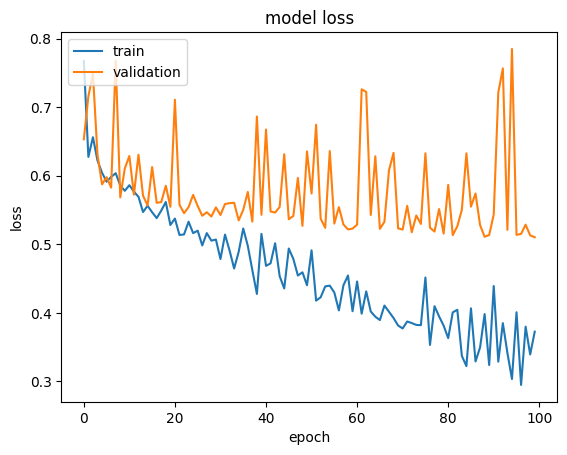

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 5. Changing the optimizer

In [14]:
# importing adam optimizer from keras optimizer module
from keras.optimizers import Adam

In [15]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(learning_rate=1e-5)

In [16]:
# change optimizer
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [17]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               15052900  
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15063101 (57.46 MB)
Trainable params: 15063101 (57.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
13/13 [==============================] - 6s 191ms/step - loss: 0.6764 - accuracy: 0.5772 - val_loss: 0.6773 - val_accuracy: 0.5609
Epoch 2/100
13/13 [==============================] - 1s 88ms/step - loss: 0.6475 - accuracy: 0.6130 - val_loss: 0.6374 - val_accuracy: 0.6459
Epoch 3/100
13/13 [==============================] - 1s 92ms/step - loss: 0.6281 - accuracy: 0.6519 - val_loss: 0.6294 - val_accuracy: 0.6459
Epoch 4/100
13/13 [==============================] - 1s 87ms/step - loss: 0.6166 - accuracy: 0.6677 - val_loss: 0.6206 - val_accuracy: 0.6516
Epoch 5/100
13/13 [==============================] - 1s 84ms/step - loss: 0.6073 - accuracy: 0.6871 - val_loss: 0.6206 - val_accuracy: 0.6558
Epoch 6/100
13/13 [==============================] - 1s 86ms/step - loss: 0.5972 - accuracy: 0.7029 - val_loss: 0.6059 - val_accuracy: 0.6671
Epoch 7/100
13/13 [==============================] - 1s 113ms/step - loss: 0.5914 - accuracy: 0.7096 - val_loss: 0.6108 - val_accuracy: 0.6671
Epoc

In [19]:
# getting predictions in the form of class as well as probabilities

predictions = model.predict(X_valid)[:, 0]
prediction = predictions.reshape(-1,)

# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(np.int64)

23/23 [==============================] - 0s 11ms/step


In [20]:
# accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, prediction_int), '%')

Accuracy on validation set: 0.7379603399433428 %


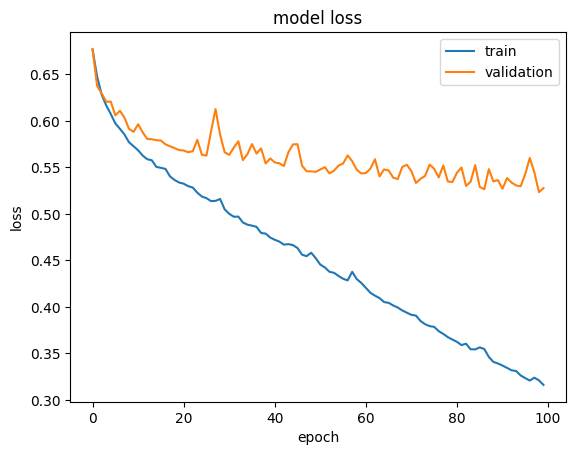

In [21]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

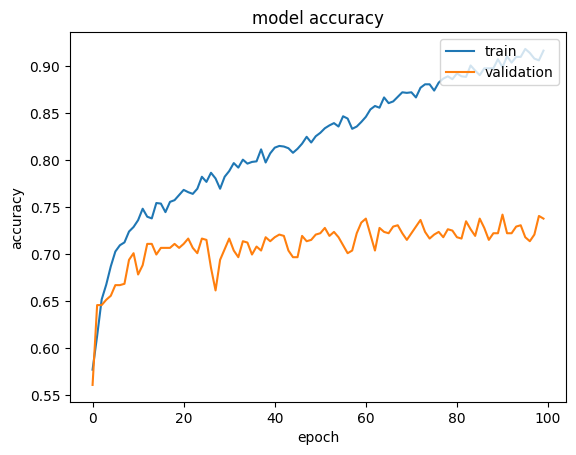

In [22]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()